In [606]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.preprocessing import LabelEncoder 


This notebook presents the outcomes of applying a stacking ensemble learning approach to the DS1 dataset. The ensemble learning comprises three tree-based machine learning classifiers: **Decision Tree, Random Forest, and AdaBoost.** Here's the breakdown of the workflow: 
+ The dataset is initially divided into a training set and a testing set using a 70-30 train-test split.
+ Within the training set, a further split is performed, creating a training subset and a validation subset using a 70-30 split ratio.
+ The training subset is utilized to train the base models, including Decision Tree, Random Forest, and AdaBoost.
+ Predictions are generated using these base models on both the validation and testing datasets.
+ The model with the highest testing accuracy is chosen as the meta learner or the final ensemble model. In this case, the choosen meta learner based on the highest testing accuracy is **Decision Tree for DS1.**
+ The predictions made by the base learners on the validation dataset serve as inputs to the meta learner.
+ The meta learner utilizes these inputs to make final predictions on the testing dataset.

# Performance Analysis on DS1 

In [576]:
dataset1 = pd.read_csv("DS1_Undersampled.csv")

In [577]:
target_categorical = LabelEncoder()

In [578]:
dataset1["label"] = target_categorical.fit_transform(dataset1["label"])
label_encoder_mapping = dict(zip(target_categorical.classes_, target_categorical.transform(target_categorical.classes_)))
print("Mapping of Label Encoded Classes", label_encoder_mapping, sep="\n")

Mapping of Label Encoded Classes
{'Malicious': 0, 'Normal': 1}


In [579]:
target_names = {0:'Malicious', 1:'Normal'}
#target_names = {0:'Bashlite', 1:'Mirai', 3:'Normal'}

In [580]:
X = dataset1.drop(["label"], axis = 1)
y = dataset1['label'].values 

In [581]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [582]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X_scaled, y, test_size = 0.30, random_state = 42)

In [583]:
print(X_train_full.shape, X_test.shape, y_train_full.shape, y_test.shape)

(27339, 115) (11717, 115) (27339,) (11717,)


In [584]:
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size = 0.30, random_state = 42)

In [585]:
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(19137, 115) (8202, 115) (19137,) (8202,)


# Decision Tree

In [586]:
clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train, y_train)

DecisionTreeClassifier()

Performance of Decision Tree on Validation Set:
Accuracy:  1.0
Precision 1.0
Recall 1.0
F1_Score 1.0

Classification Report of Decision Tree on Validation Set: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4119
           1       1.00      1.00      1.00      4083

    accuracy                           1.00      8202
   macro avg       1.00      1.00      1.00      8202
weighted avg       1.00      1.00      1.00      8202



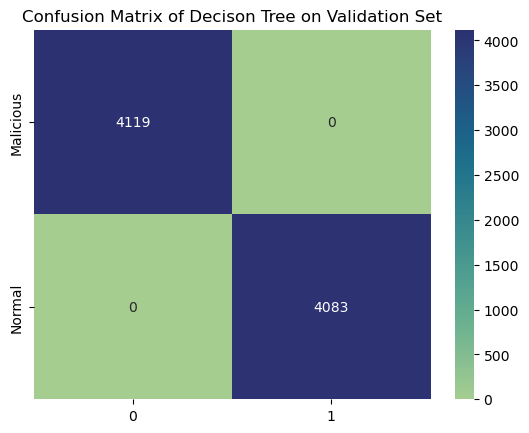

In [587]:
y_pred_dt_val = clf_dt.predict(X_val)

val_acc_dt = accuracy_score(y_val,y_pred_dt_val)

print("Performance of Decision Tree on Validation Set:")
print("Accuracy: ", val_acc_dt)
print("Precision", precision_score(y_val,y_pred_dt_val, average='weighted'))
print("Recall", recall_score(y_val,y_pred_dt_val, average='weighted'))
print("F1_Score", f1_score(y_val, y_pred_dt_val, average='weighted'))

print("")
print("Classification Report of Decision Tree on Validation Set: \n", classification_report(y_val,y_pred_dt_val))

conf_mat_dt = confusion_matrix(y_val,y_pred_dt_val)
sns.heatmap(conf_mat_dt, annot=True, fmt = 'd', cmap="crest", xticklabels=target_names, yticklabels=target_names.values())
plt.title('Confusion Matrix of Decison Tree on Validation Set')
plt.show()


Performance of Decision Tree on Testing Set:
Accuracy:  0.9996586156866092
Precision 0.999658847762961
Recall 0.9996586156866092
F1_Score 0.9996586152191157

Classification Report of Decision Tree on Testing Set: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5837
           1       1.00      1.00      1.00      5880

    accuracy                           1.00     11717
   macro avg       1.00      1.00      1.00     11717
weighted avg       1.00      1.00      1.00     11717



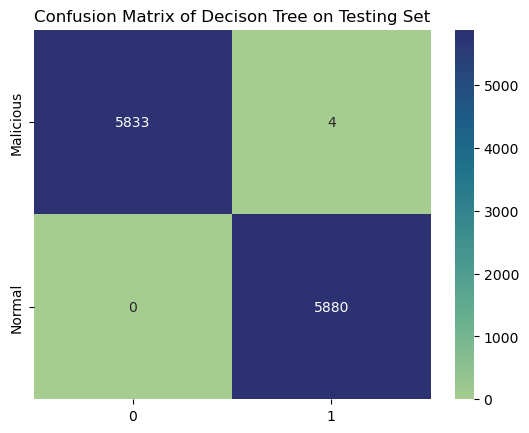

In [588]:
y_pred_dt_test = clf_dt.predict(X_test)

test_acc_dt = accuracy_score(y_test,y_pred_dt_test)

print("")
print("Performance of Decision Tree on Testing Set:")
print("Accuracy: ", test_acc_dt)
print("Precision", precision_score(y_test,y_pred_dt_test, average='weighted'))
print("Recall", recall_score(y_test,y_pred_dt_test, average='weighted'))
print("F1_Score", f1_score(y_test,y_pred_dt_test, average='weighted'))

print("")
print("Classification Report of Decision Tree on Testing Set: \n", classification_report(y_test,y_pred_dt_test))

conf_mat_dt = confusion_matrix(y_test,y_pred_dt_test)
sns.heatmap(conf_mat_dt, annot=True, fmt = 'd', cmap="crest", xticklabels=target_names, yticklabels=target_names.values())
plt.title('Confusion Matrix of Decison Tree on Testing Set')
plt.show()

In [589]:
dt_train = y_pred_dt_val
dt_test = y_pred_dt_test

# RandomForest

In [590]:
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, y_train)

RandomForestClassifier()


Performance of Random Forest on Validation Set:
Accuracy:  0.9998780785174348
Precision:  0.9998781083708831
Recall:  0.9998780785174348
F1_Score:  0.9998780785808679

Classification Report of Random Forest on Validation Set:: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4119
           1       1.00      1.00      1.00      4083

    accuracy                           1.00      8202
   macro avg       1.00      1.00      1.00      8202
weighted avg       1.00      1.00      1.00      8202



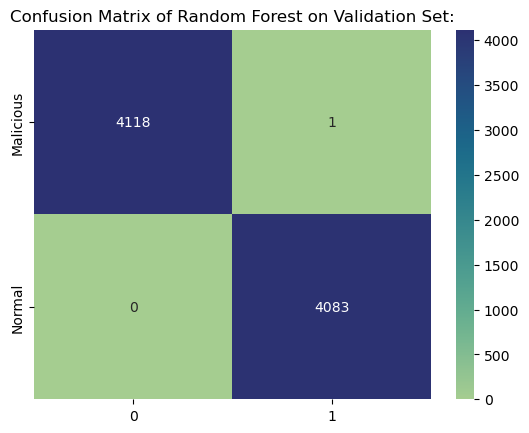

In [591]:
y_pred_rf_val = clf_rf.predict(X_val)

val_acc_rf = accuracy_score(y_val,y_pred_rf_val)

print("")
print("Performance of Random Forest on Validation Set:")
print("Accuracy: ", val_acc_rf)
print("Precision: ", precision_score(y_val,y_pred_rf_val, average='weighted'))
print("Recall: ", recall_score(y_val,y_pred_rf_val, average='weighted'))
print("F1_Score: ", f1_score(y_val,y_pred_rf_val, average='weighted'))

print("")
print("Classification Report of Random Forest on Validation Set:: \n", classification_report(y_val,y_pred_rf_val))

conf_mat_rf = confusion_matrix(y_val,y_pred_rf_val)
sns.heatmap(conf_mat_rf, annot=True, fmt = 'd', cmap="crest", xticklabels=target_names, yticklabels=target_names.values())
plt.title('Confusion Matrix of Random Forest on Validation Set:')
plt.show()


Performance of Random Forest on Testing Set:
Accuracy:  0.9994879235299138
Precision:  0.9994884455242767
Recall:  0.9994879235299138
F1_Score:  0.9994879224332919

Classification Report of Random Forest on Testing Set:: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5837
           1       1.00      1.00      1.00      5880

    accuracy                           1.00     11717
   macro avg       1.00      1.00      1.00     11717
weighted avg       1.00      1.00      1.00     11717



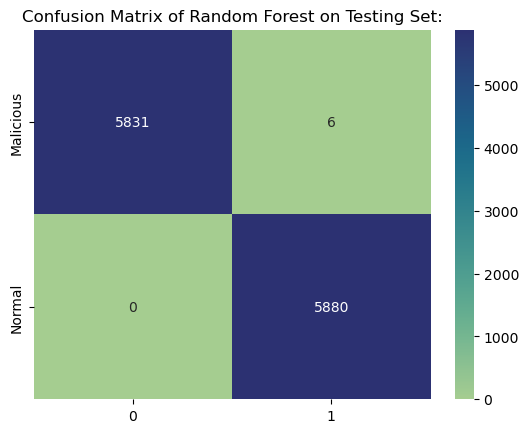

In [592]:
y_pred_rf_test = clf_rf.predict(X_test)

test_acc_rf = accuracy_score(y_test,y_pred_rf_test)

print("")
print("Performance of Random Forest on Testing Set:")
print("Accuracy: ", test_acc_rf)
print("Precision: ", precision_score(y_test,y_pred_rf_test, average='weighted'))
print("Recall: ", recall_score(y_test,y_pred_rf_test, average='weighted'))
print("F1_Score: ", f1_score(y_test,y_pred_rf_test, average='weighted'))

print("")
print("Classification Report of Random Forest on Testing Set:: \n", classification_report(y_test,y_pred_rf_test))

conf_mat_rf = confusion_matrix(y_test,y_pred_rf_test)
sns.heatmap(conf_mat_rf, annot=True, fmt = 'd', cmap="crest", xticklabels=target_names, yticklabels=target_names.values())
plt.title('Confusion Matrix of Random Forest on Testing Set:')
plt.show()

In [593]:
rf_train = y_pred_rf_val
rf_test = y_pred_rf_test

# AdaBoost

In [594]:
clf_ada = ExtraTreesClassifier()
clf_ada.fit(X_train, y_train)

ExtraTreesClassifier()


Performance of AdaBoost on Validation Set:
Accuracy:  1.0
Precision:  1.0
Recall: 1.0
F1_Score: 1.0

Classification Report of AdaBoost on Validation Set: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4119
           1       1.00      1.00      1.00      4083

    accuracy                           1.00      8202
   macro avg       1.00      1.00      1.00      8202
weighted avg       1.00      1.00      1.00      8202



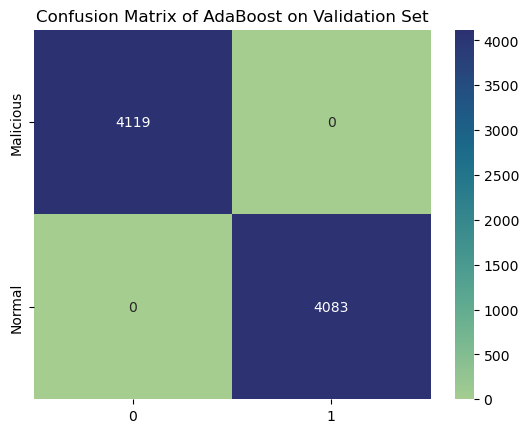

In [595]:
y_pred_ada_val = clf_ada.predict(X_val)

val_acc_ada = accuracy_score(y_val,y_pred_ada_val)

print("")
print("Performance of AdaBoost on Validation Set:")
print("Accuracy: ", val_acc_ada)
print("Precision: ", precision_score(y_val,y_pred_ada_val, average='weighted'))
print("Recall:", recall_score(y_val,y_pred_ada_val, average='weighted'))
print("F1_Score:", f1_score(y_val,y_pred_ada_val, average='weighted'))

print("")
print("Classification Report of AdaBoost on Validation Set: \n", classification_report(y_val,y_pred_ada_val))

conf_mat_ada = confusion_matrix(y_val,y_pred_ada_val)
sns.heatmap(conf_mat_ada, annot=True, fmt = 'd', cmap="crest", xticklabels=target_names, yticklabels=target_names.values())
plt.title('Confusion Matrix of AdaBoost on Validation Set')
plt.show()


Performance of AdaBoost on Testing Set:
Accuracy:  0.9994879235299138
Precision:  0.9994884455242767
Recall:  0.9994879235299138
F1_Score:  0.9994879224332919

Classification Report of AdaBoost on Testing Set:: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5837
           1       1.00      1.00      1.00      5880

    accuracy                           1.00     11717
   macro avg       1.00      1.00      1.00     11717
weighted avg       1.00      1.00      1.00     11717



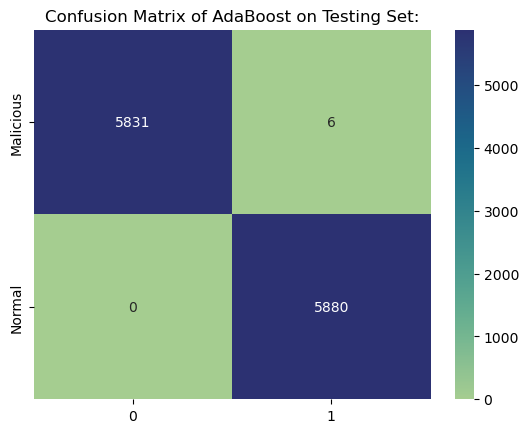

In [596]:
y_pred_ada_test = clf_rf.predict(X_test)

test_acc_ada = accuracy_score(y_test,y_pred_ada_test)

print("")
print("Performance of AdaBoost on Testing Set:")
print("Accuracy: ", test_acc_ada)
print("Precision: ", precision_score(y_test,y_pred_ada_test, average='weighted'))
print("Recall: ", recall_score(y_test,y_pred_ada_test, average='weighted'))
print("F1_Score: ", f1_score(y_test,y_pred_ada_test, average='weighted'))

print("")
print("Classification Report of AdaBoost on Testing Set:: \n", classification_report(y_test,y_pred_ada_test))

conf_mat_rf = confusion_matrix(y_test,y_pred_ada_test)
sns.heatmap(conf_mat_rf, annot=True, fmt = 'd', cmap="crest", xticklabels=target_names, yticklabels=target_names.values())
plt.title('Confusion Matrix of AdaBoost on Testing Set:')
plt.show()

In [597]:
ada_train = y_pred_ada_val
ada_test = y_pred_ada_test

# Stacking Ensemble Learning with Best Base Classifier (Decision Tree) as Meta Learner

In [598]:
min_len_train = min(len(dt_train), len(rf_train), len(ada_train), len(y_val))

base_predictions_train = pd.DataFrame({
    'DecisionTree': [dt_train[i] for i in range(min_len_train)],
    'RandomForest': [rf_train[i] for i in range(min_len_train)],
    'AdaBoostClassifier': [ada_train[i] for i in range(min_len_train)],
    'Label': [y_val[i] for i in range(min_len_train)]
})

base_predictions_train

,DecisionTree,RandomForest,AdaBoostClassifier,Label
0,0,0,0,0
1,1,1,1,1
2,1,1,1,1
3,1,1,1,1
4,1,1,1,1
...,...,...,...,...
8197,1,1,1,1
8198,1,1,1,1
8199,0,0,0,0
8200,0,0,0,0


In [599]:
min_len_test = min(len(dt_test), len(rf_test), len(ada_test), len(y_test))

base_predictions_test = pd.DataFrame({
    'DecisionTree': [dt_test[i] for i in range(min_len_test)],
    'RandomForest': [dt_test[i] for i in range(min_len_test)],
    'AdaBoostClassifier': [dt_test[i] for i in range(min_len_test)],
    'Label': [y_test[i] for i in range(min_len_test)]
})

base_predictions_test

,DecisionTree,RandomForest,AdaBoostClassifier,Label
0,0,0,0,0
1,1,1,1,1
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
11712,0,0,0,0
11713,1,1,1,1
11714,1,1,1,1
11715,0,0,0,0


In [600]:
dt_train = dt_train.reshape(-1, 1)
dt_test = dt_test.reshape(-1, 1)
rf_train = rf_train.reshape(-1, 1)
rf_test = rf_test.reshape(-1, 1)
ada_train = ada_train.reshape(-1, 1)
ada_test = ada_test.reshape(-1, 1)

In [601]:
x_train = np.concatenate(( dt_train, rf_train, ada_train), axis=1)
x_test = np.concatenate(( dt_test, rf_test, ada_test), axis=1)

In [602]:
y_train = y_val

In [603]:
x_train.shape, y_val.shape, x_test.shape, y_test.shape

((8202, 3), (8202,), (11717, 3), (11717,))

Testing accuracy of Stacking Ensemble Learning:  0.9996586156866092
Precision of Stacking Ensemble Learning:  0.999658847762961
Recall of Stacking Ensemble Learning: 0.9996586156866092
F1_Score of Stacking Ensemble Learning: 0.9996586152191157

Classification Report of Stacking Ensemble Learning: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5837
           1       1.00      1.00      1.00      5880

    accuracy                           1.00     11717
   macro avg       1.00      1.00      1.00     11717
weighted avg       1.00      1.00      1.00     11717



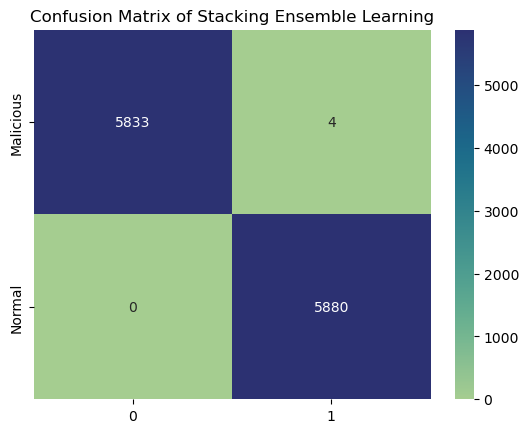

In [605]:
stacking_ensemble = DecisionTreeClassifier()
stacking_ensemble.fit(x_train, y_train)

y_pred_stacking = stacking_ensemble.predict(x_test)

print("Testing accuracy of Stacking Ensemble Learning: ", accuracy_score(y_test,y_pred_stacking))
print("Precision of Stacking Ensemble Learning: ", precision_score(y_test, y_pred_stacking, average='weighted'))
print("Recall of Stacking Ensemble Learning:", recall_score(y_test, y_pred_stacking, average='weighted'))
print("F1_Score of Stacking Ensemble Learning:", f1_score(y_test, y_pred_stacking, average='weighted'))

print("")
print("Classification Report of Stacking Ensemble Learning: \n", classification_report(y_test, y_pred_stacking))

conf_mat_ada = confusion_matrix(y_test, y_pred_stacking)
sns.heatmap(conf_mat_ada, annot=True, fmt = 'd', cmap="crest", xticklabels=target_names, yticklabels=target_names.values())
plt.title('Confusion Matrix of Stacking Ensemble Learning')
plt.show()
